# Projeto 1 - Base de Dados Covid

O objetivo do projeto será desenvolver um estudo no dataset COVID.csv , base esta que contém informações sobre casos de COVID. Ou seja a partir do diagnóstico de sintomas e informações dos pacientes deve-se
desenvolver um modelo para prever casos confirmados de COVID'.

Membros do grupo:
- Ana Luzia Akiyama
- Fernanda Kawasaki
- Henrique Castro
- Liosvaldo Santiago
- Maria Julia Martins
- Wandemberg Gibaut

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv('/work/covid.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


# Análise Exploratória dos Dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [5]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [6]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


Apos analise breve notam-se alguns pontos que ja podem ser melhorados:
- Datas de 'date_died' 9999-99-99 -> correspodem a NaN
- Colunas categoricas que possuem comportamente atipico:
    - 1 indica True e 2 indica False
    - Existem outras valores possivéis (97, 98, 99) que devem ser tratados futuramente

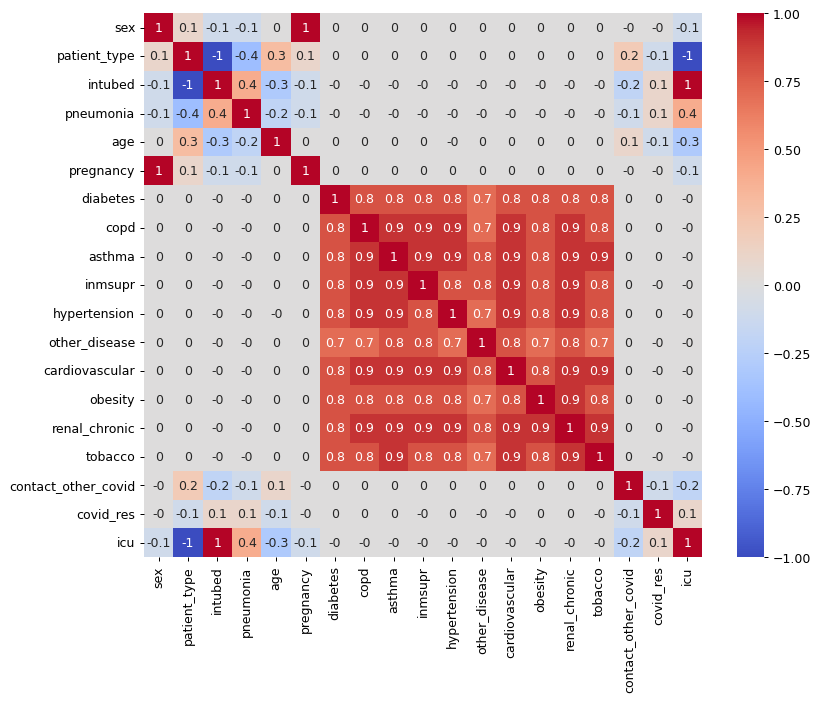

In [7]:
plt.figure(figsize=(10, 8), dpi= 90)
sns.heatmap(df.corr().round(1),
                annot=True, center=0, vmin=-1, vmax=1,
                cmap = "coolwarm")
plt.show()

Existem colunas com alta correlacao, so que depois de fazer o tratamento das colunas categoricas e rodando o corr novamente, notou-se que as correlacoes foram alteradas. Ao inves de apenas dropar essas colunas, resolvemos avaliar se elas poderao impactar no desempenho

<AxesSubplot:xlabel='age', ylabel='Count'>

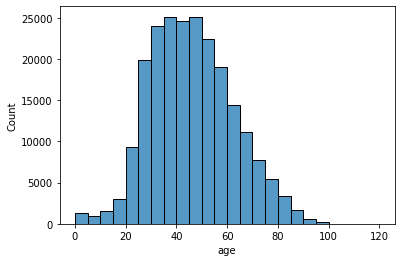

In [8]:
sns.histplot(data=df[df['covid_res'] == 1], x='age', binwidth=5)

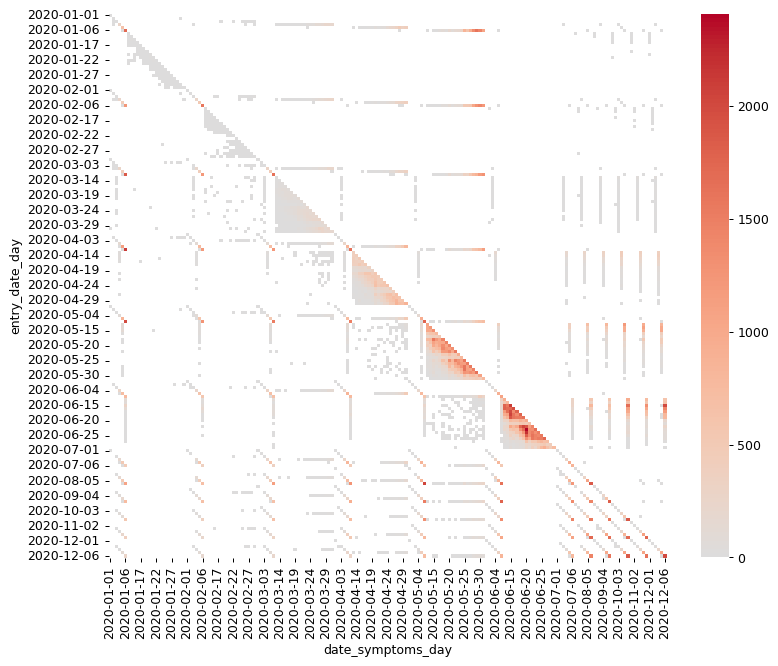

In [10]:
# Relacao entre data de entrada e data de sintomas
df['entry_date_day'] = pd.to_datetime(df['entry_date']).dt.date
df['date_symptoms_day'] = pd.to_datetime(df['date_symptoms']).dt.date

dates = df.groupby(['entry_date_day', 'date_symptoms_day']).size()
dates = dates.reset_index()
dates.columns = ['entry_date_day', 'date_symptoms_day', 'count']

dates = dates.pivot('entry_date_day', 'date_symptoms_day', 'count')
plt.figure(figsize=(10, 8), dpi= 90)

sns.heatmap(dates, center=0, vmin=0, cmap = "coolwarm")
plt.show()

df = df.drop(['entry_date_day', 'date_symptoms_day'], axis=1)

# Tratamento de dados

## Tratamento de datas

In [11]:
# convertendo dados para datetime 
df['entry_date'] = pd.to_datetime(df['entry_date'], format= '%d-%m-%Y')
df['date_symptoms'] = pd.to_datetime(df['date_symptoms'], format= '%d-%m-%Y')

In [12]:
df['date_died'] = df['date_died'].replace({'9999-99-99':np.nan})
df['date_died'] = pd.to_datetime(df['date_died'], format= '%d-%m-%Y')

## Tratamento de colunas categoricas

In [13]:
categorical_cols = ['intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr',
                     'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 
                    'tobacco', 'contact_other_covid', 'covid_res', 'icu', 'patient_type']

### Analisando valores 2, 3, 97, 98 e 99

In [14]:
print(df[categorical_cols].apply(lambda col: col.unique()))

intubed                [97, 2, 1, 99]
pneumonia                  [2, 1, 99]
pregnancy              [97, 2, 1, 98]
diabetes                   [2, 1, 98]
copd                       [2, 1, 98]
asthma                     [2, 1, 98]
inmsupr                    [2, 1, 98]
hypertension               [2, 1, 98]
other_disease              [2, 1, 98]
cardiovascular             [2, 1, 98]
obesity                    [2, 1, 98]
renal_chronic              [2, 1, 98]
tobacco                    [2, 1, 98]
contact_other_covid        [2, 99, 1]
covid_res                   [1, 2, 3]
icu                    [97, 2, 1, 99]
patient_type                   [1, 2]
dtype: object


#### Trocando 2 por 0
Segundo o dicionario de dados do Kaggle, o valor 2 corresponde a False, para padronizar esse dado, optamos para mudar o valor 2 para o valor 0, que comumente é usado como False.

In [15]:
df[categorical_cols[:-1]] = df[categorical_cols[:-1]].replace({2:0})

#### 3 em covid_res
Esse valor indica pessoas que ainda estao esperando o resultado do teste, nesse caso iremos simplesmente dropar as linhas, uma vez que elas nao contribuem para a analise

In [16]:
df = df.drop(df[df['covid_res'] == 3].index)

#### 97 em icu e intubed
Aparentemente 97 ("não se aplica") nos casos de ICU e Intubed ocorre quando o paciente foi ambulatorio, o que realmente faz sentido, ja que se o paciente nao precisou ser internado ele obviamente nao foi intubado ou precisou de UTI. Para diminuir essa dependencia entre os dados, iremos substituir o 97 por 0, indicando que, apesar de não se aplicar ao caso, ainda sim é False para a feature

In [17]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,2020-05-04,2020-05-02,NaT,97,0,27,97,0,0,0,0,0,0,0,0,0,0,0,1,97
1,1009bf,2,1,2020-03-19,2020-03-17,NaT,97,0,24,97,0,0,0,0,0,0,0,0,0,0,99,1,97
2,167386,1,2,2020-04-06,2020-04-01,NaT,0,0,54,0,0,0,0,0,0,0,0,1,0,0,99,1,0
3,0b5948,2,2,2020-04-17,2020-04-10,NaT,0,1,30,97,0,0,0,0,0,0,0,0,0,0,99,1,0
4,0d01b5,1,2,2020-04-13,2020-04-13,2020-04-22,0,0,60,0,1,0,0,0,1,0,1,0,0,0,99,1,0


In [18]:
df[['icu', 'patient_type', 'intubed']].where(df['icu'] == 97).value_counts()

icu   patient_type  intubed
97.0  1.0           97.0       392146
dtype: int64

In [19]:
df[['icu','intubed']] = df[['icu','intubed']].replace({97:0})

#### 97 em pregnancy
No caso do 97 em pregnancy, o valor sempre ocorre em linhas onde o paciente é homem. Seguindo a lógica da categoria acima, iremos substituir 97 por 0.

In [20]:
df[['pregnancy','sex']].where(df['pregnancy'] == 97).value_counts()

pregnancy  sex
97.0       2.0    253098
dtype: int64

In [21]:
df['pregnancy'] = df['pregnancy'].replace({97:0})

#### 98's
Em primeiro momento vamos assumir que os 98 sao relevantes para analise, vamos manter eles e tratar como uma categoria valida.

Para futuro vale avaliar dropar eles e reavaliar o modelo

In [22]:
df[categorical_cols].where(df==98).any(axis=1).sum()

4613

#### 99's (NaN's)

In [23]:
df[categorical_cols] = df[categorical_cols].replace({99: np.nan})
df.isna().sum()

id                          0
sex                         0
patient_type                0
entry_date                  0
date_symptoms               0
date_died              465571
intubed                   122
pneumonia                  11
age                         0
pregnancy                   0
diabetes                    0
copd                        0
asthma                      0
inmsupr                     0
hypertension                0
other_disease               0
cardiovascular              0
obesity                     0
renal_chronic               0
tobacco                     0
contact_other_covid    153675
covid_res                   0
icu                       123
dtype: int64

Para 'intubed', 'pneumonia', 'icu', onde ocorrem poucos NaN's, vamos usar a moda para dar o imputar os valores faltantes

In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df[['intubed', 'pneumonia', 'icu']] = imputer.fit_transform(df[['intubed', 'pneumonia', 'icu']])

Para 'contact_other_covid', onde os NaN's representam uma parte significativa dos dados, vamos tratar como uma nova categoria

In [25]:
imputer = SimpleImputer(strategy='constant', fill_value=2)
df[['contact_other_covid']] = imputer.fit_transform(df[['contact_other_covid']])

Vale notar que estamos ignorando os valores NaN na feature date_died porque a feature em si não será utilizada nos modelos a seguir

## Feature engineering

### Feature Died
A data da morte em si pode não contribuir muito para o modelo, contudo o fato de o paciente ter morrido ou não é interessante, dessa forma a feature died foi criada. Ela segua a seguinte relação:

Se date_died e NaN entao e 0 senao 1

In [26]:
df['died'] = np.where(df['date_died'].isna(), 0, 1)

### Feature entry_symptoms_time
Assim como a data da morte, as datas dos primeiros sintomas e a data do registro podem não dizer muito sobre o registro em questão. Essa feature consegue trazer um pouco de informação ao modelo. Ela segue a seguinte relação:

Diferenca entre data do primeiro sintoma e de entrada

In [27]:
df['entry_symptoms_time'] = (df['entry_date'] - df['date_symptoms']).dt.days

In [28]:
np.sort(df['entry_symptoms_time'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 48, 49, 51, 53, 58, 59, 60, 62,
       63, 65, 68, 69, 70, 83, 89, 90])

### Feature has_disease
Muitas colunas do dataset indicam se o paciente tem algum tipo de doença. Uma possível forma de simplificar esse dado, seria criando uma feature indicando se o paciente possui alguma doença. Nos modelos testaremos se essa feature poderá agregar. A feature segua a seguinte lógica:

Caso tenha qualquer uma das doencas ['diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension', 'cardiovascular', 'obesity', 'renal_chronic'] fica como true

In [37]:
diseases_col = ['diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension','other_disease', 'cardiovascular', 'obesity', 'renal_chronic']
df['has_disease'] = np.where(df[df[diseases_col] == 1].any(axis=1), 0, 1)

# Análise Pt. 2

No inicio da pandemia o numero de infectados, e consequentemente, o numero de teste positivos foi muito baixo, contudo com desenvolvimento esse numero aumenta.

<AxesSubplot:xlabel='entry_date', ylabel='covid_res'>

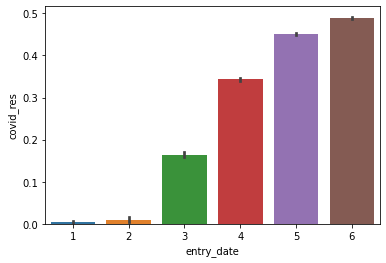

In [30]:
sns.barplot(x=df['entry_date'].dt.month, y=df['covid_res'])

<AxesSubplot:xlabel='entry_date', ylabel='count'>

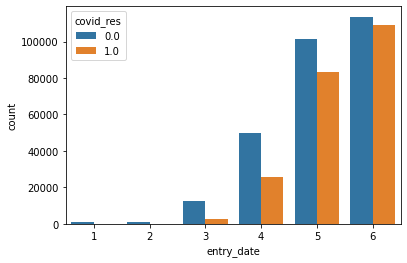

In [ ]:
sns.countplot(x=df['entry_date'].dt.month, hue=df['covid_res'])

<AxesSubplot:xlabel='has_disease', ylabel='count'>

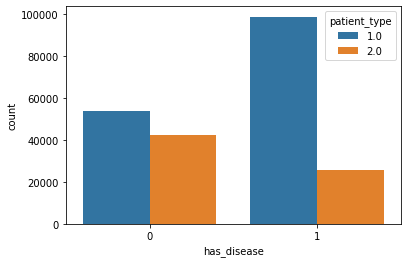

In [ ]:
sns.countplot(data=df[df['covid_res'] == 1], x='has_disease', hue='patient_type')

Obs.: em patient_type, 1 indica que e uma paciente de ambulatorio e 2 uma paciente internado

<AxesSubplot:xlabel='died', ylabel='count'>

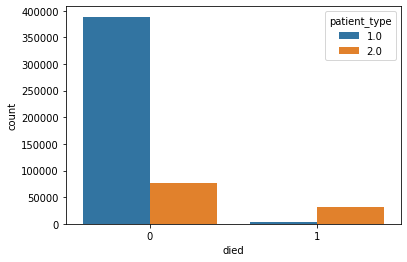

In [ ]:
# df[df['died'] == 1].covid_res.value_counts()
sns.countplot(data=df, x='died', hue='patient_type')

In [ ]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,died,entry_symptoms_time,has_disease
0,16169f,2,1.0,2020-05-04,2020-05-02,NaT,0.0,0.0,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,2,1
1,1009bf,2,1.0,2020-03-19,2020-03-17,NaT,0.0,0.0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0,2,1
2,167386,1,2.0,2020-04-06,2020-04-01,NaT,0.0,0.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0,5,0
3,0b5948,2,2.0,2020-04-17,2020-04-10,NaT,0.0,1.0,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0,7,1
4,0d01b5,1,2.0,2020-04-13,2020-04-13,2020-04-22,0.0,0.0,60,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1,0,0


<AxesSubplot:xlabel='entry_symptoms_time'>

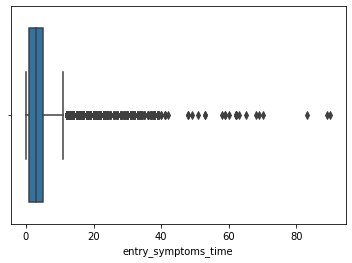

In [35]:
sns.boxplot(data=df, x='entry_symptoms_time')

Podemos notar que existem grandes outliers para a feature **entry_symptoms_time** que criamos anteriormente 

# Modelagem
Para avaliar desempenho de nosso modelo nos vamos utilizar a metrica de **ROC AUC** e  **recall**. A métrica ROC AUC foi escolhida para podermos comparar os difrentes modelos desenvolvidos. Já a métrica de recall foiescolhida  porque no caso de doencas infecciosas queremos minimizar os falsos negativos, ja que caso alguem infectado receba um teste negativo ela continuara espalhando a doenca. Pode-se argumentar que os falsos positivos causariam gastos com tratamento e prevencao da doenca, mas no caso do COVID esses gastos sao relativamente baixos, uma vez que um paciente que testou positivo pode ser encaminhado para quarentena em casa.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


## Remoção de dados indisponíveis

É importante notar que alguns dados no dataset não estarão presentes no momento da análise. Exemplos disso são as colunas icu e intubed, que são dependem de um diagnóstico positivo de COVID-19. Assim, não teríamos esses dados no ambiente de produção. Logo, essas colunas serão removidas para realizar o treinamento dos modelos.

In [ ]:
# Drop de colunas que nao serao usadas ou que nao estarao disponiveis
X = df.drop(columns=['covid_res', 'id', 'entry_date', 'date_symptoms', 'date_died', 'intubed', 'icu']) 
y = df['covid_res']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=42)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sex                  499692 non-null  int64  
 1   patient_type         499692 non-null  float64
 2   pneumonia            499692 non-null  float64
 3   age                  499692 non-null  int64  
 4   pregnancy            499692 non-null  float64
 5   diabetes             499692 non-null  float64
 6   copd                 499692 non-null  float64
 7   asthma               499692 non-null  float64
 8   inmsupr              499692 non-null  float64
 9   hypertension         499692 non-null  float64
 10  other_disease        499692 non-null  float64
 11  cardiovascular       499692 non-null  float64
 12  obesity              499692 non-null  float64
 13  renal_chronic        499692 non-null  float64
 14  tobacco              499692 non-null  float64
 15  contact_other_cov

## Baseline Geral
Um baseline geral para todos modelos seria caso o paciente tenha qualquer outra doenca testar ele como positivo

In [ ]:
y_pred = np.where(X_test['has_disease'] == 1, 1, 0)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.49      0.33      0.39     83711
         1.0       0.40      0.56      0.47     66197

    accuracy                           0.43    149908
   macro avg       0.44      0.45      0.43    149908
weighted avg       0.45      0.43      0.43    149908



0.44728335406485653

In [ ]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x7f9b9c163440>)

In [ ]:
for i, val in sorted([(i, val) for i, val in enumerate(fs.scores_)], key=lambda x: x[1]):
	print('Feature %s %d: %f' % (X_train.columns[i], i, fs.scores_[i]))

Feature sex 0: 307.761745
Feature contact_other_covid 16: 1027.150161
Feature icu 17: 1096.738609
Feature has_disease 20: 1533.911564
Feature pregnancy 5: 1641.554150
Feature patient_type 1: 2006.381246
Feature intubed 2: 2034.526180
Feature tobacco 15: 3635.856615
Feature asthma 8: 4116.736960
Feature inmsupr 9: 4203.012774
Feature copd 7: 4214.147445
Feature other_disease 11: 4349.099056
Feature renal_chronic 14: 4596.717986
Feature cardiovascular 12: 5504.306295
Feature hypertension 10: 7525.075801
Feature diabetes 6: 7700.820108
Feature obesity 13: 7948.218637
Feature pneumonia 3: 12028.082276
Feature died 18: 12202.924182
Feature entry_symptoms_time 19: 23583.811034
Feature age 4: 63531.076138


## KNN
best performance -> ROC 0.589

### Modelo 1

In [ ]:
# Criando uma pipe generalizada para depois testar diferentes features
modelo = KNeighborsClassifier()

# Selecao das colunas
numeric_features = ['age', 'entry_symptoms_time']
categorical_features = ['sex', 'patient_type', 'pregnancy', 'intubed', 'contact_other_covid', 'icu', 'died', 'has_disease']

# Criacao do tratamento de cada tipo de col
categorical_pipe = Pipeline([
    ('onehot', OneHotEncoder(drop='if_binary'))
])

numeric_pipe = Pipeline([
    ('normalize', StandardScaler())
])

column_processing = ColumnTransformer([
    ('num', numeric_pipe, numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

# Motando a pipe em si
knn_pipe = Pipeline([
    ('preprocessing', column_processing),
    ('model', modelo)
])

In [ ]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('normalize',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'entry_symptoms_time']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['sex', 'patient_type',
                                                   'pregnancy', 'intubed',
                                                   'contact_other_covid', 'icu',
                                                   'died', 'has_disease'])])),
                ('model', KNeighborsClassifier())])

In [ ]:
y_pred = knn_pipe.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.63      0.68      0.65     83711
         1.0       0.55      0.50      0.53     66197

    accuracy                           0.60    149908
   macro avg       0.59      0.59      0.59    149908
weighted avg       0.60      0.60      0.60    149908



0.5896841031799567

### Modelo 2

In [ ]:
categorical_features = ['hypertension', 'diabetes', 'obesity', 'pneumonia', 'died']

In [ ]:
column_processing.set_params(transformers=[
    ('num', numeric_pipe, numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('normalize',
                                                  StandardScaler())]),
                                 ['age', 'entry_symptoms_time']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='if_binary'))]),
                                 ['hypertension', 'diabetes', 'obesity',
                                  'pneumonia', 'died'])])

In [ ]:
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.62      0.67      0.65     83711
         1.0       0.54      0.48      0.51     66197

    accuracy                           0.59    149908
   macro avg       0.58      0.58      0.58    149908
weighted avg       0.58      0.59      0.58    149908



0.5764210906487974

## Random Forest

### Modelo 1

In [ ]:
# Criando uma pipe generalizada para depois testar diferentes features
modelo = RandomForestClassifier(random_state=42)

# Selecao das colunas
numeric_features = ['age', 'entry_symptoms_time']
categorical_features = ['sex', 'patient_type', 'pregnancy', 'intubed', 'contact_other_covid', 'icu', 'died', 'has_disease']

# Criacao do tratamento de cada tipo de col
categorical_pipe = Pipeline([
    ('labelenc', OrdinalEncoder())
])

numeric_pipe = Pipeline([
    ('normalize', StandardScaler())
])

column_processing = ColumnTransformer([
    ('num', numeric_pipe, numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

# Motando a pipe em si
rf_pipe = Pipeline([
    ('preprocessing', column_processing),
    ('model', modelo)
])

In [ ]:
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('normalize',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'entry_symptoms_time']),
                                                 ('cat',
                                                  Pipeline(steps=[('labelenc',
                                                                   OrdinalEncoder())]),
                                                  ['sex', 'patient_type',
                                                   'pregnancy', 'intubed',
                                                   'contact_other_covid', 'icu',
                                                   'died', 'has_disease'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred = rf_pipe.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.63      0.80      0.71     83711
         1.0       0.62      0.42      0.50     66197

    accuracy                           0.63    149908
   macro avg       0.63      0.61      0.60    149908
weighted avg       0.63      0.63      0.62    149908



0.6079224625703489

### Modelo 2

In [ ]:
X_train.columns

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu', 'died', 'entry_symptoms_time',
       'has_disease'],
      dtype='object')

In [ ]:
categorical_features = ['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu', 'died']
column_processing.set_params(transformers=[
    ('num', numeric_pipe, numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('normalize',
                                                  StandardScaler())]),
                                 ['age', 'entry_symptoms_time']),
                                ('cat',
                                 Pipeline(steps=[('labelenc',
                                                  OrdinalEncoder())]),
                                 ['sex', 'patient_type', 'intubed', 'pneumonia',
                                  'pregnancy', 'diabetes', 'copd', 'asthma',
                                  'inmsupr', 'hypertension', 'other_disease',
                                  'cardiovascular', 'obesity', 'renal_chronic',
                                  'tobacco', 'contact_other_covid', 'icu',
                                  'died'])])

In [ ]:
rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.64      0.77      0.70     83711
         1.0       0.60      0.44      0.51     66197

    accuracy                           0.62    149908
   macro avg       0.62      0.61      0.60    149908
weighted avg       0.62      0.62      0.61    149908



0.6055001305499101

## XGboost Classifier

In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install xgboost

     |████████████████████████████████| 173.6 MB 15 kB/s 
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [ ]:
from xgboost import XGBClassifier
from sklearn.decomposition import PCA


xg_model = XGBClassifier(objective = 'binary:logistic')

xg_hiperparams = {
    'pca__n_components': [5, 10, 15, 20, 25, 30],
    'model__max_depth': [2, 3, 5, 7, 10],
    'model__n_estimators': [10, 100, 500],
    'model__learning_rate': [0.1, 0.3, 0.5, 0.8],
}


# Selecao das colunas
numeric_features = ['age', 'entry_symptoms_time']
categorical_features = ['sex', 'patient_type', 'pregnancy', 'intubed', 'contact_other_covid', 'icu', 'died', 'has_disease']

# Criacao do tratamento de cada tipo de col
categorical_pipe = Pipeline([
    ('labelenc', OrdinalEncoder())
])

numeric_pipe = Pipeline([
    ('normalize', StandardScaler())
])

column_processing = ColumnTransformer([
    ('num', numeric_pipe, numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

# Motando a pipe em si
xg_pipe = Pipeline([
    ('preprocessing', column_processing),
    ('pca', PCA()),
    ('model', xg_model)
    
])

# Otimizacao de modelo

In [ ]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('normalize',
                                                     StandardScaler())]),
                                    ['age', 'entry_symptoms_time']),
                                   ('cat',
                                    Pipeline(steps=[('onehot',
                                                     OneHotEncoder(drop='if_binary'))]),
                                    ['hypertension', 'diabetes', 'obesity',
                                     'pneumonia', 'died'])])),
  ('model', KNeighborsClassifier())],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('normalize',
                                                   StandardScaler())]),
                                  ['age', 'entry_symptoms_time']),
                                 ('cat',
         

In [ ]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('normalize',
                                                     StandardScaler())]),
                                    ['age', 'entry_symptoms_time']),
                                   ('cat',
                                    Pipeline(steps=[('labelenc',
                                                     OrdinalEncoder())]),
                                    ['sex', 'patient_type', 'intubed', 'pneumonia',
                                     'pregnancy', 'diabetes', 'copd', 'asthma',
                                     'inmsupr', 'hypertension', 'other_disease',
                                     'cardiovascular', 'obesity', 'renal_chronic',
                                     'tobacco', 'contact_other_covid', 'icu',
                                     'died'])])),
  ('model', RandomForestClassifier(random_state=42))],
 'verbose

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

knn_hiperparams = {
    'model__n_neighbors':[1,3,5,7,9],
    'model__p': [1,2],
    'model__weights': ['uniform', 'distance']
}

rf_hiperparams = {
    'model__max_depth' : [None, 1, 5, 10, 15, 50],
    'model__min_samples_split' : [2, 10, 50, 100, 500, 1000],
    'model__min_samples_leaf' : [1, 5, 10, 25, 50],
}

In [ ]:
knn_rand_search = RandomizedSearchCV(knn_pipe, knn_hiperparams, cv=3, n_iter=10, random_state=42, verbose=10)
# knn_search = knn_rand_search.fit(X_train, y_train)


In [ ]:
print(knn_rand_search.cv_results_['mean_test_score'].mean().round(3))
print(f'best params: {knn_rand_search.best_params_}')

AttributeError: 'RandomizedSearchCV' object has no attribute 'grid_scores_'

In [ ]:
knn_pipe.set_params(model__weights='uniform')
knn_pipe.set_params(model__p=2)
knn_pipe.set_params(model__n_neighbors=9)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('normalize',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'entry_symptoms_time']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['hypertension', 'diabetes',
                                                   'obesity', 'pneumonia',
                                                   'died'])])),
                ('model', KNeighborsClassifier(n_neighbors=9))])

In [ ]:
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)


print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.63      0.69      0.66     83711
         1.0       0.55      0.48      0.52     66197

    accuracy                           0.60    149908
   macro avg       0.59      0.59      0.59    149908
weighted avg       0.60      0.60      0.60    149908



0.587414684663366

In [ ]:
rf_rand_search = RandomizedSearchCV(rf_pipe, rf_hiperparams, cv=3, n_iter=10, random_state=42, verbose=10)
# rf_search = rf_rand_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START model__max_depth=None, model__min_samples_leaf=25, model__min_samples_split=10
[CV 1/3; 1/10] END model__max_depth=None, model__min_samples_leaf=25, model__min_samples_split=10;, score=0.654 total time=  30.5s
[CV 2/3; 1/10] START model__max_depth=None, model__min_samples_leaf=25, model__min_samples_split=10
[CV 2/3; 1/10] END model__max_depth=None, model__min_samples_leaf=25, model__min_samples_split=10;, score=0.652 total time=  29.8s
[CV 3/3; 1/10] START model__max_depth=None, model__min_samples_leaf=25, model__min_samples_split=10
[CV 3/3; 1/10] END model__max_depth=None, model__min_samples_leaf=25, model__min_samples_split=10;, score=0.656 total time=  32.3s
[CV 1/3; 2/10] START model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=2
[CV 1/3; 2/10] END model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.618 total time=   8.3s
[CV 2/3; 2/10] START mo

In [ ]:
print(knn_rand_search.cv_results_['mean_test_score'].mean().round(3))
print(f'best params: {knn_rand_search.best_params_}')
knn_pipe.set_params(model__weights='uniform')
knn_pipe.set_params(model__p=2)
knn_pipe.set_params(model__n_neighbors=9)
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)


print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

In [ ]:
print(rf_rand_search.cv_results_['mean_test_score'].mean().round(3))
print(f'best params: {rf_rand_search.best_params_}')

0.646
best params: {'model__min_samples_split': 100, 'model__min_samples_leaf': 10, 'model__max_depth': None}


In [ ]:
rf_pipe.set_params(model__min_samples_split=100)
rf_pipe.set_params(model__min_samples_leaf=10)
rf_pipe.set_params(model__max_depth=None)

rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_test)


print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.65      0.82      0.73     83711
         1.0       0.67      0.44      0.53     66197

    accuracy                           0.66    149908
   macro avg       0.66      0.63      0.63    149908
weighted avg       0.66      0.66      0.64    149908



0.6336588292389579

In [ ]:
xg_rand_search = RandomizedSearchCV(xg_pipe, xg_hiperparams, cv=3, n_iter=10, random_state=42)
xg_rand_search.fit(X_train, y_train)

print(xg_rand_search.cv_results_['mean_test_score'].mean().round(3))
print(f'best params: {xg_rand_search.best_params_}')

/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[02:57:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and

In [ ]:
xg_pipe.set_params(pca__n_components=5)
xg_pipe.set_params(model__n_estimators=100)
xg_pipe.set_params(model__max_depth=5)
xg_pipe.set_params(model__learning_rate=0.1)

xg_pipe.fit(X_train, y_train)
y_pred = xg_pipe.predict(X_test)


print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[03:01:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.65      0.81      0.72     83711
         1.0       0.65      0.44      0.52     66197

    accuracy                           0.65    149908
   macro avg       0.65      0.63      0.62    149908
weighted avg       0.65   

0.6250628446877016

# Conclusão

O dataset trabalhado apresenta um problema bem atual no cenário da pandemia da COVID-19, que por dois anos - e contanto - vem fazendo diversas vítimas fatais. A inexperiência dos serviços médicos tornou ainda mais complicado a gestão de recursos como respiradores, vagas na UTI etc. Assim, métodos de Aprendizado de Máquina poderiam servir de auxilio à decisão na prioridade de alocação de tratamento. 
Buscamos então encontrar um método - e um respectivo conjunto de hiperparâmetros - que pudesse de forma satisfatória prever as chances de um paciente ser diagnosticado positivamente com COVID-19. Abaixo, um pouco de nosso processo de desenvolvimento.

## Etapas de Desenvolvimento
Iniciamos o projeto realizando a preparação dos dados. Fizemos uma análise exploratória dos dados presentes no dataset, bem como a criação de gráficos para ajudar a visualizar e entender como os dados estão distribuídos. Tratamos os casos faltantes e os casos mais específicos, como os valores 97, 98 e 99. Alguns desses casos foram tratados de modo diferente:

- Entradas da coluna 'covid_res' que possuem valor '3' foram removidos, pois constituem basicamente dados não rotulados ('3'= aguardando resultados)
- 'intubed', 'pneumonia'e 'icu' tiveram suas entradas faltantes preenchidas com o valor mais frequente
- Os valores relativos a desconhecido na coluna 'contact_other_covid' foram tratados como uma nova categoria ('2')
- Retiramos também dados como 'date_died' por não fazer sentido para o problema.
- Retiramos os dados icu e intubed, pois eles dependem diretamente do diagnostico positivo, e também não estariam disponíveis em ambiente de produção

Além disso, também criamos duas features: died (se o paciente morreu) e has_disease (se o paciente tem doença).

### Modelo Baseline

Como modelo-base desenvolvemos uma decisão simples baseado no diagnostico de outras doenças prévias no paciente: caso ele possuisse uma comorbidade, o método diagnosticaria positivamente. Para isso criamos uma *feature* nova 'has_disease' de modo a facilitar essa decisão. No entanto, o **Baseline** apresentou resultados bastante ruins (*precision*: 0.44, *recall*: 0.45, *f1-score*: 0.43), sendo efetivamente pior que a decisão meramente aleatória.

### Modelo KNN
Em seguida desenvolvemos um modelo de **K-Nearest Neighbours** o qual otimizamos através de uma exploração de hiperparâmetros por busca aleatória (**Random Search**). O método demorou bastante para convergir em seu treinamento, mas atingiu resultados consideravelmente melhores (*precision*: 0.59, *recall*: 0.59, *f1-score*: 0.59, *roc_auc*: 0.5874), ainda que baixos para um problema tão sério. Esses resultados foram obtidos com os seguintes parâmetros:

- 'model__weights': 'uniform'
- 'model__p': 2
- 'model__n_neighbors': 9



### Modelo Random Forest
Testamos ainda uma método de **Random Forest**, que pode ser entendido basicamente como um *ensemble* de **Árvores de Decisão** (**Decision Trees**). Novamente, como uma otimização de hiperparâmetros por busca aleatória, obtivemos resultados melhores que o **Baseline** (*precision*: 0.66, *recall*: 0.63, *f1-score*: 0.63, *roc_auc*: 0.6336), porém com um tempo de execução mais aceitável. Esse resultado foi obtido com os seguintes parâmetros:

- 'model__min_samples_split': 100
- 'model__min_samples_leaf': 10
- 'model__max_depth': None


### Modelo XGBoost
Por fim, resolvemos testar um modelo de *boosting* o **XGBoost**. Aqui, obtivemos resultados equivalentes ao **Random Forest** (*precision*: 0.65, *recall*: 0.63, *f1-score*: 0.62, *roc_auc*: 0.6251), porem vale notar que. Os hiperparâmetros foram obtidos por busca aleatória e são:

- 'pca__n_components': 5
- 'model__n_estimators': 100
- 'model__max_depth': 5
- 'model__learning_rate': 0.1


Vale notar que a **espeficidade** (isto é, quantos diagnosticos negativos foram corretamente previstos, o **recall** do *0*) dos modelos **Random Forest** e **XGBoost** apresentam valores de 0.82 e 0.81, podendo ser utilizados como bom indicativo de resultado negativo.


### Conclusões

Mesmo testando mais de um método e otimizando os parâmetros, foi dificil obter bons resultados. Isto nos mostra que provalmente os dados de entrada possuem baixa correlação com o diagnostico ou não de covid-19, mas talvez possuam relação com a sobrevivência pós-doença. Devido a natureza da forma de contaminação (espalhamento pelo ar) a *feature* de contato com outras pessoas infectadas possivelmente possui sozinha maior relação, informação que pode ser vislumbrada um pouco no mapa de correlação.



## rascunho

- parametros criados, parametros removidos
- baseline - 50%?
- otimizacao dos hiperparametros dos modelos
- melhores features Lasso: 'sex', 'patient_type', 'pneumonia', 'age', 'contact_other_covid'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=51a49710-5991-4d9e-8d88-f90d59cca546' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>